# Big Data Analytics
Praktikum Sommersemester 2023. <small>Version 1.0</small>

# Aufgabe 4: DataFrames 

### Arbeitsanweisung

Bereiten Sie Ihr Wissen über Dataframes mit pandas auf und arbeiten Sie mit dem Datensatz Iris. Platzieren Sie Ihre Lösungen in den vorgegeben Zellen, so dass der darin ausgeführte Code die geforderte Ausgabe produziert. Liefern Sie auch aussagekräftiges Markdown den Aufgaben.

----
Für diese Aufgabe stehen die folgenden Dateien in der JupyterLab-Umgebung zur Verfügung:

* `Big_Data_Analytics_1/datasets/iris/*`<br>Iris-Datensatz

## Aufgabe 4

1. Erarbeiten Sie sich das nötige Wissen zum Einlesen von Daten in einen `pandas Dataframe` (z.B. aus „Python for Data Analysis“ (bzw. der deutschen Ausgabe)).

2. Laden sie den Iris-Datensatz in einen Dataframe und geben Sie grundlegende Statistiken zu den Daten aus (wie geht das einfach mit einem Dataframe?).

3. Visualisieren Sie den Datensatz
    1.  Als Scattermatrix (mittels des python Paketes `matplotlib`)
    2.  Als Boxplots für die einzelnen Spalte des Datensatzes


4. Welche Schlüsse können Sie aus den Daten und deren Visualisierungen hinsichtlich einer möglichen Klassifikation der Daten ziehen?

### Vorbereitung:

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

### Aufgabe 4: 2. Iris-Datensatz in einen Dataframe laden
----------------
- der Iris-Datensatz wird in einen DataFrame (**dataframe**) geladen.
- Das Argument ``sep=' '`` gibt an, dass die Werte durch Leerzeichen getrennt sind.
- ``describe()`` berechnet grundlegende Statistiken für die Daten, und die Ergebnisse werden in der Variablen **stats** gespeichert und ausgegeben.

In [99]:
# Aufgabe 4 2

data = "data.all"
dataframe = pd.read_csv(data, sep=' ', header=None)

# Berechnung grundlegender Statistiken
stats = dataframe.describe()
print(stats)

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.057333    3.758000    1.199333
std      0.828066    0.435866    1.765298    0.762238
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


In [105]:
header = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Species"]
dataframe.columns = header
print(dataframe)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width         Species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


### Aufgabe 4: 3a. Scattermatrix
----------------
1. die Variablen (außer den Klassenlabels) extrahieren und als **features** gespeichert
2. die Klassenlabels (letzte Spalte) extrahieren und als **iris_names** gespeichert
3. eine Liste der eindeutigen Klassen im Datensatz erstellen (**labels**)
4. eine Farbpalette für die Klassen, um die Punkte in den Diagramm entsprechend einzufärben.
    - Iris-setosa: rot
    - Iris-versicolor: grün
    - Iris-virginica: blau
5. eine Figur ``plt.figure(figsize=(10, 10))`` mit Größe 10 x 10 erstellen
6. die Variablen **i** und **j** repräsentieren die Indizes der Variablen.
7. für jedes Merkmalpaar wird ein neues Subplot mit ``fig.add_subplot``. Der Index wird berechnet als ``i * features.shape[1] + j + 1``, um eine korrekte Platzierung des Subplots sicherzustellen.
8. Dann werden **i** und **j** geplottet und wenn die beide gleich sind, wird ein Histogramm ``.hist()`` dafür erstellt.
9. mit ``plt.show()`` wird die Figur angezeigt

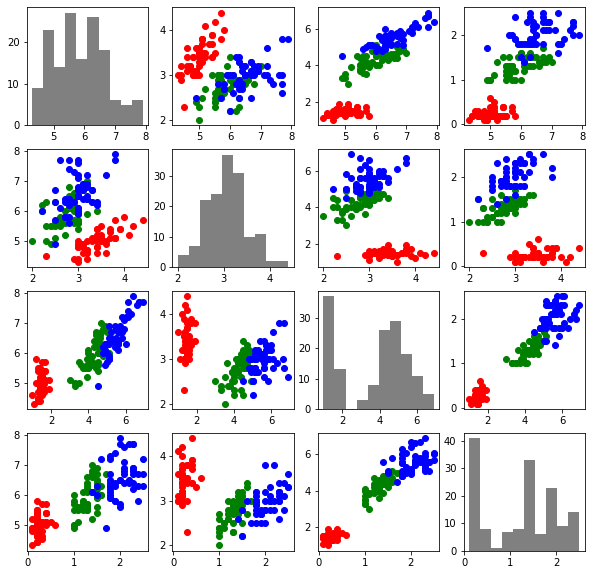

In [106]:
# Aufgabe 4 3A

features = df.iloc[:, :-1]

iris_names = df.iloc[:, -1]
labels = iris_names.unique()
colours = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

fig = plt.figure(figsize=(10, 10))
for i in range(features.shape[1]):
    for j in range(features.shape[1]):
        ax = fig.add_subplot(features.shape[1], features.shape[1], i * features.shape[1] + j + 1)
        if i == j:
            ax.hist(features.iloc[:, i], color='gray')
        else:
            for label in labels:
                class_data = features[iris_names == label]
                ax.scatter(class_data.iloc[:, i], class_data.iloc[:, j], color=colours[label])

plt.show()

### Aufgabe 4: 3b. Boxplots
----------------
``dataframe.iloc[:, :-1]`` - alle Zeilen (:) und alle Spalten außer der letzten Spalten(:-1) wurden ausgewählt <br>
``.boxplot()`` - um die Verteilung und Ausreißer in den einzelnen Spalten des Datensatzes darzustellen <br> 
``plt.show()`` - der Plot wird angezeigt

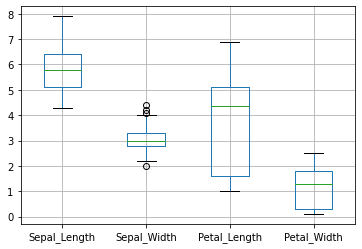

In [107]:
# Aufgabe 4 3B

dataframe.iloc[:, :-1].boxplot()
plt.show()

### Aufgabe 4: 4. Klassifikation der Daten
----------------

- Auf dem **Scatterplot** ist zu erkennen, dass die Punkte von ``Iris-setosa`` im Allgemeinen deutlich von den Punkten der anderen beiden Klassen getrennt sind. <br>
Das heißt die Merkmale von ``Iris-setosa`` sind im Vergleich zu den anderen Arten stärker ausgeprägt.

- Im **Boxplot** ist auch zu sehen, dass die ``Iris-setosa`` im Vergleich zu den anderen Klassen kleinere Werte hat. <br>

#### Aus diesen beiden Gründen kann ``Iris-setosa`` als Klassifikation der Daten dienen.
